## Project On
# Geospatial Data Analysis & Spatiotemporal Machine Learning with Python


## Submitted by Group-8
 **1. Afroza Begum, BARI**
 
 **2. Md. Aminul Islam, BARI** 
 
 **3. Md. Imrul Islam, SPARRSO**



## Title 
### Prediction of the crop condition during the harvesting season using machine learning algorithms

## Introduction
##### Agriculture is still the most important primary economic activity for ensuring food security in this technological age. The agricultural situation in Bangladesh is extremely precarious, as the amount of agricultural land available has been shrinking with the increase of population. Providing food security for a large population with little agricultural land has become incredibly challenging. All the stakeholders of agriculture have been providing their tremendous effort to increase the agriculture production with a view to attain food security. It is essential to estimate agricultural productivity in order to assure food security. There are various uncertainties in the estimation of agricultural production, such as seasonal abnormalities, natural disasters, insect infestations, pesticide use, and so on, all of which have a significant impact on agricultural crop production.  Technology, data science, and machine learning have opened up new avenues for addressing the uncertainties in the agricultural production estimating process these days. Agro-technology and precision farming, sometimes known as digital agriculture, are new scientific fields that use data-intensive methods to boost agricultural productivity while lowering environmental impact. A variety of instruments collect data generated in modern agricultural operations, allowing for a better understanding of both the operational environment (a dynamic interaction of crop, soil, and weather conditions) and the operation itself (machinery data), resulting in more accurate and faster decisions. Machine learning (ML) has risen to popularity as a result of big data technologies and high-performance computers, opening up new avenues for unraveling, measuring, and understanding data-intensive agricultural processes. Machine learning allows for accurate prediction and estimate of farming parameters, allowing crop management and livestock production systems to be more economically efficient. There are a number of open-source data and machine learning techniques that can help in agricultural production estimation. This project takes advantage of the open-source data and machine learning tools that are available.

## Objectives
 **1. To predict crop condition (healthy or damaged) during harvesting season using different machine learning algorithms.**
 
 **2. To understand the impact of available features on crop condition**


## Dataset
#### click here to [*Dataset*](https://github.com/afrozalopa/Crop-condition)

## Problem statement

##### A farmer's profession is a true test of endurance and tenacity, even though many of us do not appreciate it. Farmers usually work hard from the seeds sowing to crop harvest to ensure a good harvest at the end of the season. Factors like water availability, soil fertility, pest controlling measures, timely application of necessary beneficial chemicals, and nature contribute to a good yield. While many of these factors are beyond to control, the farmer can manage the amount and frequency of pesticides while growing crops. Pesticides are also special as they protect the crop with the right dosage. But, applying more than the required, they may affect the entire harvest. Various types of pesticides at high levels can deem the crops dead or make it unsuitable for consumption. This information is based on crops harvested by various farmers at the end of harvest season. 

## Data description

##### This datasets consist of a nine varables that includes: 

 * Estimated_Insects_Count: Estimated insects count per square meter

 * Crop_Type-: Category of Crop(0,1)

 * Soil_Type: Category of Soil (Red soil=0, Black soil=1)

 * Pesticide_Use_Category: Type of pesticides uses (1= No pesticide used, 2= Previously used pesticides, 3= Currently Using pesticide)

 * Number_Doses_Week: Number of doses per week

 * Number_Weeks_Used: Number of weeks used

 * Number_Weeks_Quit: Number of weeks to quit the pesticide application in whole season

 * Season: Season Category (1= Kharif, 2= Rabi, 3= Summer)

 * Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)
 
##### Among the variables, Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit have numerical records and rest 5 are categorical variables. ID represents the records of the individual farmer. 

## Methods
##### We have done the following steps to complete the project work. The steps are listed below:
##### Step 1:   We have gathered and understood the datasets
##### Step 2:   Managing data i.e. exploration and features engineering like; dealing with missing values, normalization, resampling and splitting has been done  
  
##### Step 3:   Models like Random Forest, Decision Tree and ANN have been selected for the datasets
##### Step 4:   Accuracy has been tested on default models
##### Step 5:   Grid search with K-fold cross-validation have been done in every model for hyperparameter tuning
##### Step 6:   Scoring of models, assessment of performances and comparison have been done for evaluation
##### Step 7:   Impact of features has been extracted with the best fitted model
##### Step 8:   Prediction has been made with the best fitted model 


# Importing Libraries

In [6]:
import pandas as pd  #Helps in analyzing data with python
import numpy as np   #Helps in performing mathematical operations.
import matplotlib.pyplot as plt  #It provides an object-oriented API for embedding plots into applications
import seaborn as sns  #Helps us in data visualizatio

from sklearn.model_selection import train_test_split #Helps us in dividing the dataset into training and test set.
from sklearn.preprocessing import MinMaxScaler  #Helps us in normalizing the data.
from sklearn.metrics import classification_report,confusion_matrix #Helps us in visualizing the result performed by our model.
from sklearn.metrics import accuracy_score #Helps in analyzing the accuracy score of model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier #import random forest classifier
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier
from sklearn.neural_network import MLPClassifier #import mlp classifier
import warnings
warnings.filterwarnings("ignore") #Helps us get rid of warning using warning filter.
from time import time

%matplotlib inline
plt.style.use("ggplot") 
warnings.simplefilter("ignore") #Helps us get rid of warnings
plt.rcParams["figure.figsize"] = (8, 4) 

## Loading Dataset

In [7]:
train=pd.read_csv('Dataset_1.csv')
predict=pd.read_csv('Dataset_2.csv')

##### Here, we have train and predict datasets. Dataset_1 is considered as train data and we will use Dataset_2 for prediction after model selection.

## Results

### Exploratory Data Analysis

In [8]:
#lets see how dataset looks like

train.head(3).append(train.tail(3))

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


##### Training dataset comprises of 10 columns as variables with a total of 88857 records for each. First column cotains records 

##### related to the farmers ID. It is noted that among the columns, Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used 

##### and  Number_Weeks_Quit are numerical variables and rest other columns represent the categorical data. 

In [9]:
 train.columns #Gives the name of all the columns in training data

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [10]:
predict.columns #Gives the name of all the columns in predict data

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

##### Both training and predict datasets contain same variables. As Crop_Damage is the target variable, so, it is absent in predict dataset.

In [11]:
train.describe()  #gives description about all the variables of training dataset.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


##### From the description table, it is observed that 

 * all the colums represent the similar number of records except the column Number_Weeks_Used as it contains less number of records (79858). 

 * variation in number of observations for insects are very high which ranges from a minimum value of 150 to a maximum value of 4097 with a mean value of around 1400.
 * Average Number_Doses_Week is close to 26 with a range of 0 to 95.
 * Number_Weeks_Used varies from 0 to 67 with a mean value of around 29.

In [12]:
predict.describe()  #gives description about all the variables of predict dataset.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


##### Pandas describe() function provides the statistical summary about the data such as mean, max, min, standard deviation, count along with this we can also pass the percentiles.

In [13]:
train.info()  #gives information about all the variables of training set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [14]:
predict.info()  #gives information about all the variables of predict dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


##### Info tables of both training and predict data indicates that there are some missing or NaN values in both the datasets. A total of 88858 and   

##### 59310 records are observed in training and predict data respectively.

In [15]:
train.corr() #various correlations between different variables of training set.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


<AxesSubplot:>

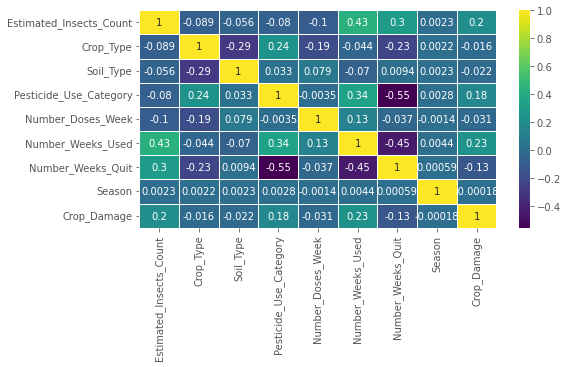

In [16]:
# plotting the correlations
sns.heatmap(train.corr(), annot = True, linewidth = 0.5,cmap='viridis')

##### From the correlation heat map, we notice that though there are no high correlation exist among the variables, however, there are some positive correlation between Pesticide_Use_Category and Crop_Type, Number_Weeks_Used and Estimated_Insects_Count, Number_Weeks_Used and Pesticide_Use_Category, Number_Weeks_Quit and Estimated_Insects_Count and 

##### negative correlation between Number_Weeks_Quit and Pesticide_Use_Category as well as Number_Weeks_Quit and Number_Weeks_Used. Crop damage shows somewhat positive correlation with Estimated_Insects_Count, Pesticide_Use_Category and Number_Weeks_Used. 

In [17]:
predict.corr() #various correlations between different variables of predict dataset.

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.092645,-0.056395,-0.085671,-0.103554,0.437127,0.300151,-0.006288
Crop_Type,-0.092645,1.000000,-0.292243,0.231684,-0.189827,-0.044664,-0.235283,0.002850
Soil_Type,-0.056395,-0.292243,1.000000,0.036276,0.078851,-0.066028,0.008656,-0.003056
Pesticide_Use_Category,-0.085671,0.231684,0.036276,1.000000,0.004707,0.344605,-0.551182,-0.004395
Number_Doses_Week,-0.103554,-0.189827,0.078851,0.004707,1.000000,0.127386,-0.040878,0.001580
Number_Weeks_Used,0.437127,-0.044664,-0.066028,0.344605,0.127386,1.000000,-0.445626,-0.003330
Number_Weeks_Quit,0.300151,-0.235283,0.008656,-0.551182,-0.040878,-0.445626,1.000000,0.003223
Season,-0.006288,0.002850,-0.003056,-0.004395,0.001580,-0.003330,0.003223,1.000000


<AxesSubplot:>

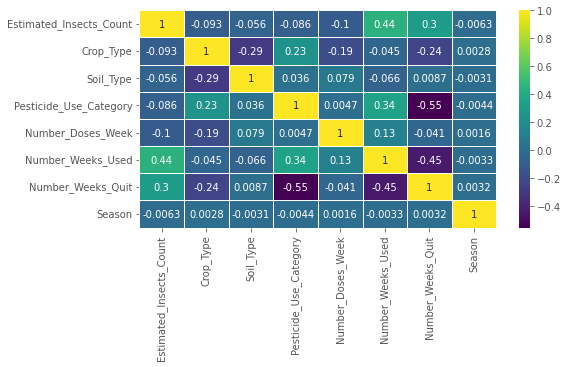

In [18]:
# plotting the correlations
sns.heatmap(predict.corr(), annot = True, linewidth = 0.5,cmap='viridis')

##### Similar trends are observed in case of the predict data.

## Missing Data

<AxesSubplot:>

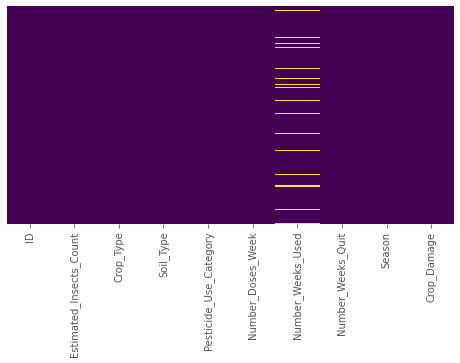

In [19]:
#checking for columns having any missing values in training set.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

##### Heatmap shows the position of missing value in the specific column. Here, we see, a number of null records in the Number_Weeks_Used variable. 

In [20]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

##### There are 9000 null values present in the Number_weeks_used column

<AxesSubplot:>

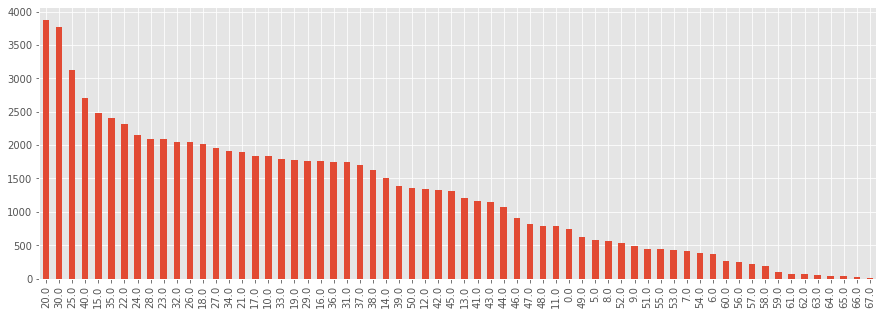

In [21]:
# lets see unique values and how many times it repeated in Number_Weeks_Used column. so, we can get an idea how to fill null values.

train['Number_Weeks_Used'].value_counts().plot(kind='bar',figsize=(15,5))


##### From the graph, we see that Number_Weeks_Used varies from 20 to 67. Frequencies gradually decreased with the increase of

##### Number_Weeks_Used. Highest frequency observed in case of 20 Number_Weeks_Used followed by 30. so, we can get an idea how to 

##### fill null values.

## Filling the missing data

In [22]:
#Number_Weeks_Used has some missing values.
train['Number_Weeks_Used'].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [23]:
#the mean value comes out to be around 29.
#so filling in the missing data with the value 29.
train['Number_Weeks_Used'].fillna(value = 29.0, inplace = True)

##### From the description table of training dataset, it is observed that the mean value of Number_Weeks_Used is 28.62 which is 

##### rounded to 29 and then we replace the null values with the mean value. Here, we have used forward fill to impute the 

##### missing values.



<AxesSubplot:>

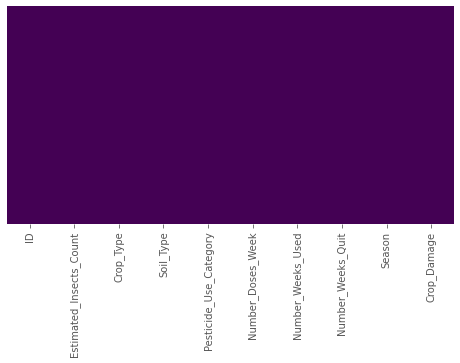

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis") #rechecking for missing data

##### After filling the missing value with the mean one, the heat map shows no null values in that specific column in the training dataset.

In [25]:
train.isnull().sum()

# no null values are present

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

<AxesSubplot:>

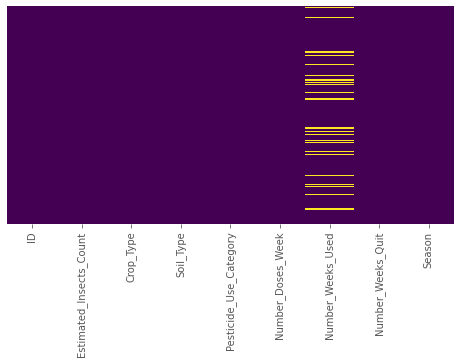

In [26]:
#checking for columns having any missing values in test set.
sns.heatmap(predict.isnull(), yticklabels=False, cbar=False, cmap="viridis")

##### Heatmap shows the position of missing records in the same column of predict dataset too. Here, we see, a number of null records in the Number_Weeks_Used variable.

In [27]:
predict.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

##### There are 5893 null values present in the Number_weeks_used column

<AxesSubplot:>

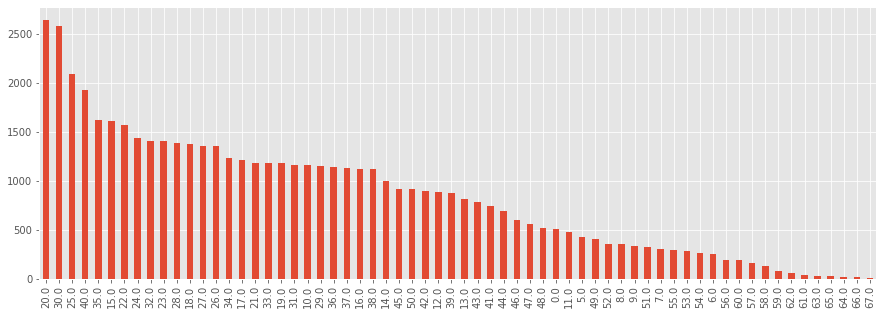

In [28]:
# lets see unique values and how many times it repeted in Number_Weeks_Used column. so, we can get an idea how to fill null values.

predict['Number_Weeks_Used'].value_counts().plot(kind='bar',figsize=(15,5))

##### From the graph, we see that like traing dataset, Number_Weeks_Used used varies from 20 to 67. Frequencies gradually decrease with the increase of Number_Weeks_Used. Highest frequency observed in case of 20 Number_Weeks_Used followed by 30.

In [29]:
#Number_Weeks_Used has some missing values.
predict['Number_Weeks_Used'].describe()

count    53417.000000
mean        28.705094
std         12.421211
min          0.000000
25%         20.000000
50%         28.000000
75%         38.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

##### From the description table for predict dataset, it is observed that the mean value of Number_Weeks_Used is 28.70 which is rounded to 29 and then we replace the null values with the mean value. Here, we have used forward fill to impute the missing values just for simplicity.

In [30]:
#the mean value comes out to be around 29.
#so filling in the missing data with the value 29.
predict['Number_Weeks_Used'].fillna(value = 29.0, inplace = True)

<AxesSubplot:>

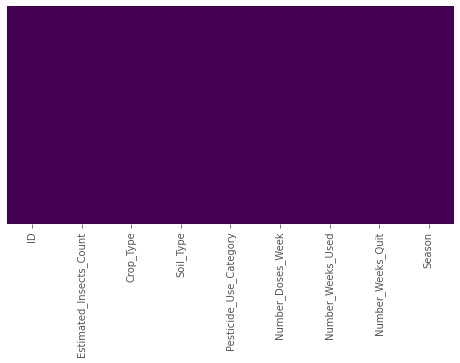

In [31]:
sns.heatmap(predict.isnull(), yticklabels=False, cbar=False, cmap="viridis") #rechecking for missing data

##### After filling the predict dataset with the mean one, the heat map shows no null values in that specific column in the predict dataset.

# Filtering

In [32]:
train[(train['Season']==1)&(train['Crop_Type']==0)]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
11,F00000023,1575,0,0,1,0,0.0,0,1,1
16,F00000035,2138,0,1,1,0,0.0,0,1,1
17,F00000037,2401,0,1,1,0,29.0,0,1,1
25,F00000054,151,0,0,3,40,20.0,0,1,0
29,F00000063,188,0,0,3,25,19.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
88477,F00155230,3337,0,1,2,50,51.0,8,1,0
88478,F00155239,3516,0,1,2,20,37.0,19,1,0
88480,F00155246,3702,0,1,2,10,56.0,6,1,0
88493,F00155265,3896,0,1,2,60,48.0,10,1,2


#### Grouped data frame provides the following information: 
* Here, we encounter higher number of insects in crop type 0 than crop type 1 regarding the season 1, 2 and 3. 
* As Crop_Damage_0 has higher number of observations than the other Crop_Damage categories, the number of insects found higher in that particular category when associated with season and crop type.

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

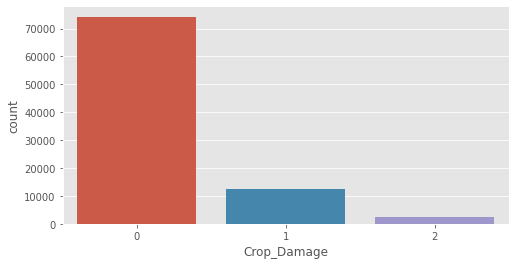

In [33]:
sns.countplot(x = 'Crop_Damage' , data= train)

##### Bar graph shows, more than 75000 records of crops are alive.

<AxesSubplot:title={'center':'Pie chart of Percentage of Crop_Damage'}, ylabel='Crop_Damage'>

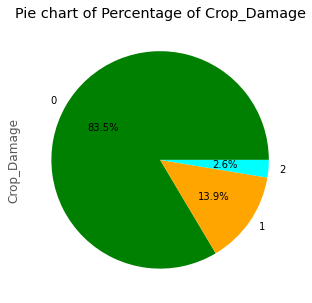

In [34]:
train['Crop_Damage'].value_counts().plot(kind='pie',autopct = '%1.1f%%',colors=['green','orange','cyan'],title = "Pie chart of Percentage of Crop_Damage",figsize=(5,5))

##### Pie chart shows the following crop damage information;
 * 83.5% of crops are alive
 * 2.6% of crops are damaged due to pestisides
 * 13.9% of crops are damaged due to other reasons

<AxesSubplot:ylabel='Crop_Type'>

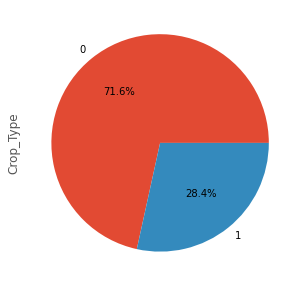

In [35]:
#sns.countplot(df['Crop_Type'])
train['Crop_Type'].value_counts().plot(kind='pie',autopct= '%1.1f%%',figsize=(5,5))

#### Pie chart shows the following crop type information;
 * 71.6% of the crops are belongs to 0 type_crop.
 * 28.4% of the crops are belongs to 1 type-crop

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='count'>

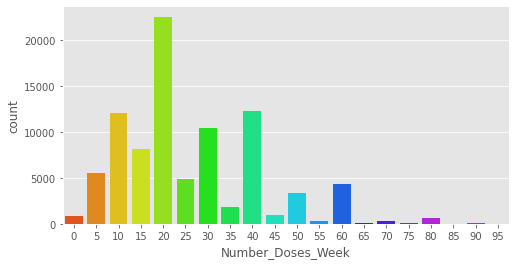

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(train['Number_Doses_Week'], palette = 'hsv')

##### Most of the farmers uses 20 doses in a week

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

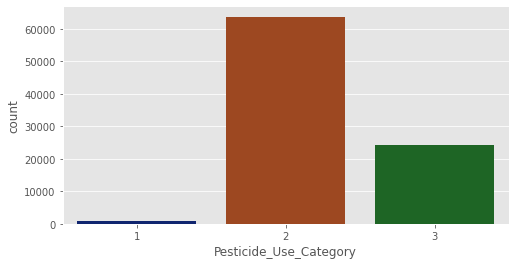

In [37]:
sns.countplot(train['Pesticide_Use_Category'], palette = 'dark')

#####  Figure indicates frequent use of the previously used pesticide category (Pesticide_Use_Category 2). Farmers are more reluctant to the use of new pesticide (Pesticide_Use_Category 3).

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>],
       [<AxesSubplot:title={'center':'Pesticide_Use_Category'}>,
        <AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>],
       [<AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'Crop_Damage'}>]], dtype=object)

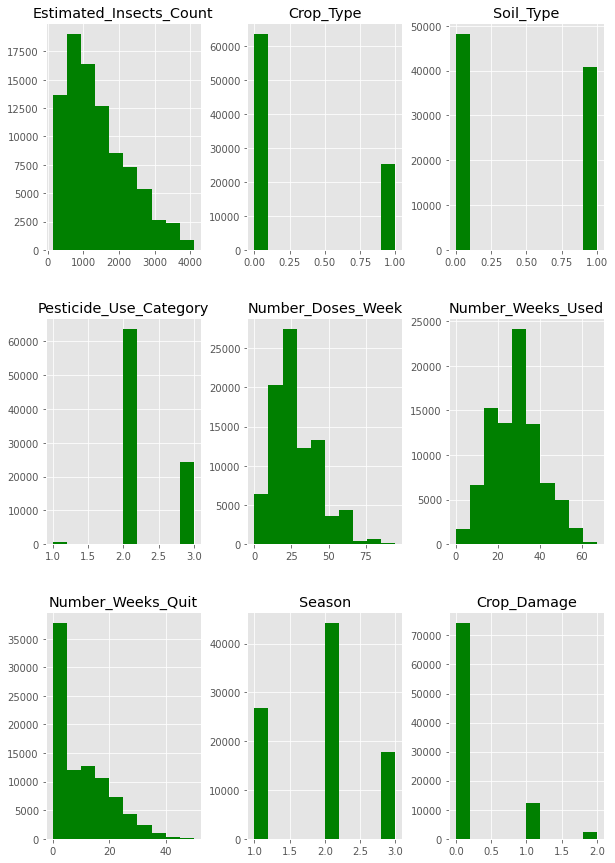

In [38]:
col= train.columns
train[col].hist(figsize=(10,15),color = 'green')

##### From the histogram of different variables, it is observed that :
 * Estimated_Insects_Count is right skewed. Most of the data loadings are found in the left side. Most of the records encounter insects count within the range of 200 to 1600.
 * Crop type 1 represents almost 1/3rd of the type 0 category.
 * Ratio of records between soil type 0 and soil type 1 is close to 1.
 * Most of the farmers use pesticides for crop production. But, tendency of using previously used pesticides (Pesticide_Use_Category 2) is far higher than the new ones (Pesticide_Use_Category 3).
 * Majority of farmers use 20-30 Number_Doses_Week.
 * Higher frequency is observed when the Number_Weeks_Used ranges from 30-35.
 * Number_Weeks_Quit is also right skewed. Like Estimated_Insects_Count, most of the data loadings are found in the left side. The highest frequency is observed when the range lies between 0-5.
 * Season 2 has the highest number of observations followed by the Season 1 and the lowest observation is recorded in Season 3.
 * Crop damage 0 (alive) category represents the significant highest frequencies than that of other two crop damage category (Crop_Damage 1 and Crop_Damage 2).
 

# Cross tabulation of crop damage with other features

In [39]:
pd.DataFrame(train.groupby(['Crop_Damage','Crop_Type'])['ID'].count())

ID
Crop_Damage Crop_Type       
0           0          52778
            1          21460
1           0           9204
            1           3103
2           0           1607
            1            706

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

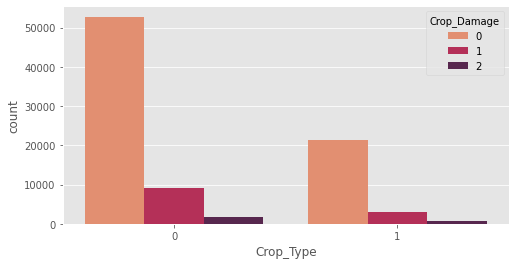

In [40]:
sns.countplot(train['Crop_Type'], hue = train['Crop_Damage'],palette="rocket_r")

#### Frequencies of crop damage plotted against the crop type. From the table and the bar graph, it is observed that : 
 * more than 74,000 ID's  crop is  alive  irrespective of their crop_type. 
 * total dataset contains around 89000 records of which 74,238 records show the crop is alive 
 * only around 2200 crops are damaged due to pestisides and remaining are damaged by other reasons
 * damaged due to other reason is more than damaged due to pesticides

## Impact of Insects and pesticides on Crop damage

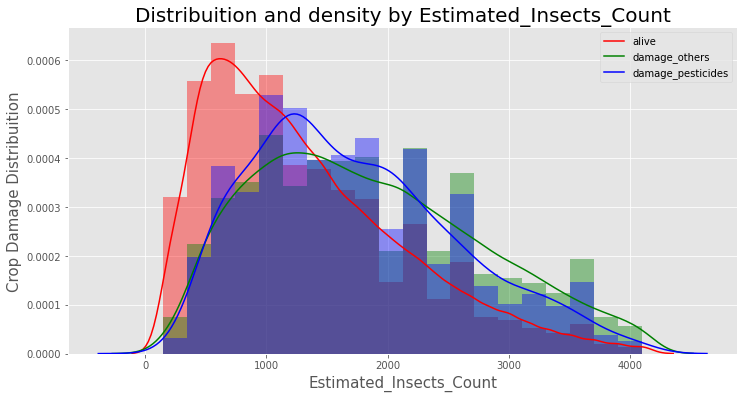

In [41]:
# Create new variables based on Crop damage category in the range of Estimated_Insects_Count
alive = train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 0)]
damage_others = train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 1)]                                   
damage_pesticides = train[(train["Estimated_Insects_Count"] > 0) & 
                              (train["Crop_Damage"] == 2)]

#figure size
fig = plt.figure(figsize=(12,6))

# Ploting the 2 variables that we create and compare the three
sns.distplot(alive["Estimated_Insects_Count"], bins=20, color='r')
sns.distplot(damage_others["Estimated_Insects_Count"], bins=20, color='g')
sns.distplot(damage_pesticides["Estimated_Insects_Count"], bins=20, color='b')
                                   
plt.title("Distribuition and density by Estimated_Insects_Count",fontsize=20)
plt.xlabel("Estimated_Insects_Count",fontsize=15)
plt.ylabel("Crop Damage Distribuition",fontsize=15)
fig.legend(bbox_to_anchor=(0.9, 0.88),loc = "upper right", labels=['alive','damage_others', 'damage_pesticides'])
plt.show()

##### We observe higher number of alive crops with the lower number of insects.
##### when the insects population is 1000 or below, the alive plants are the maximum.


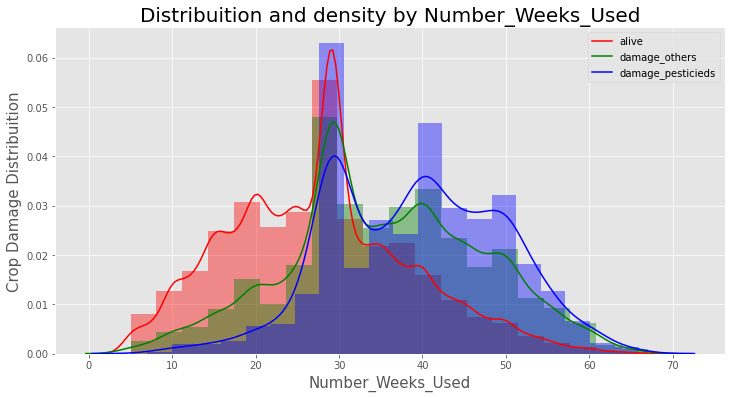

In [42]:
# Create new variables based on Crop damage category in the range of Estimated_Insects_Count
alive = train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 0)]
damage_others = train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 1)]                                   
damage_pesticieds = train[(train["Number_Weeks_Used"] > 0) & 
                              (train["Crop_Damage"] == 2)]

#figure size
fig = plt.figure(figsize=(12,6))

# Ploting the 2 variables that we create and compare the three
sns.distplot(alive["Number_Weeks_Used"], bins=20, color='r')
sns.distplot(damage_others["Number_Weeks_Used"], bins=20, color='g')
sns.distplot(damage_pesticieds["Number_Weeks_Used"], bins=20, color='b')
                                   
plt.title("Distribuition and density by Number_Weeks_Used",fontsize=20)
plt.xlabel("Number_Weeks_Used",fontsize=15)
plt.ylabel("Crop Damage Distribuition",fontsize=15)
fig.legend(bbox_to_anchor=(0.9, 0.88),loc = "upper right", labels=['alive','damage_others', 'damage_pesticieds'])
plt.show()

##### Less damage or the maximum alive crop are found when the number of doses are 15 to 30 of which 20 doses_week shows the best results.
##### Crop damage due to pesticidal effect is observed as higher with the increased number of doses applied.

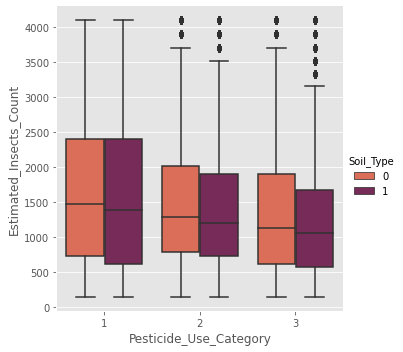

In [43]:
sns.catplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', kind = 'box', data = train, hue = 'Soil_Type', palette= 'rocket_r')

In [44]:
pd.DataFrame(train.groupby(['Season','Crop_Damage'])['ID'].count())

ID
Season Crop_Damage       
1      0            22493
       1             3748
       2              661
2      0            36881
       1             6115
       2             1214
3      0            14864
       1             2444
       2              438

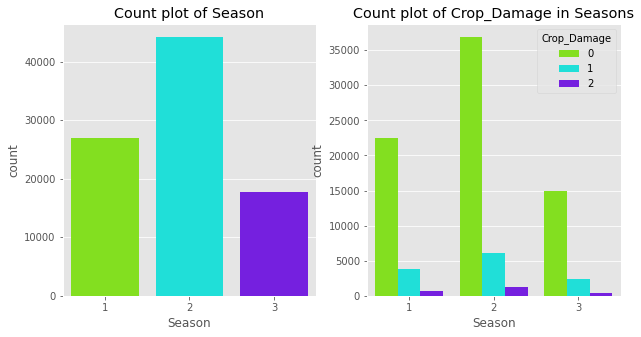

In [45]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(train['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(train['Season'], hue = train['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

##### Among the 3 cropping seasons, the second season (Season 2) has the maximum count. Some other observation are as follows :
 * Maximum alive crops are noticed in the season 2 followed by the season 1 and minimum alive crops in the Season 3.
 * As the number of records are higher in the season 2, count on crops damage categories is also higher in that particular season.

In [46]:
pd.DataFrame(train.groupby(['Season','Crop_Type'])['ID'].count())

ID
Season Crop_Type       
1      0          19269
       1           7633
2      0          31664
       1          12546
3      0          12656
       1           5090

<AxesSubplot:xlabel='Season', ylabel='count'>

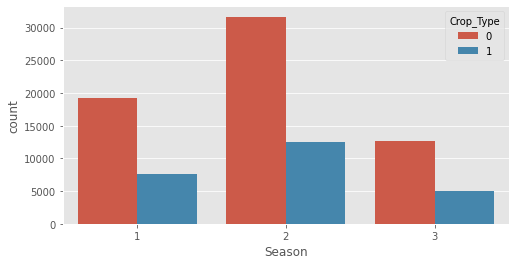

In [47]:
sns.countplot(train['Season'], hue = train['Crop_Type'])

##### Number of records for crop type 0 is higher than that of crop type 1 throughout the seasons.
##### The majority of the crops are grown in the second season. 

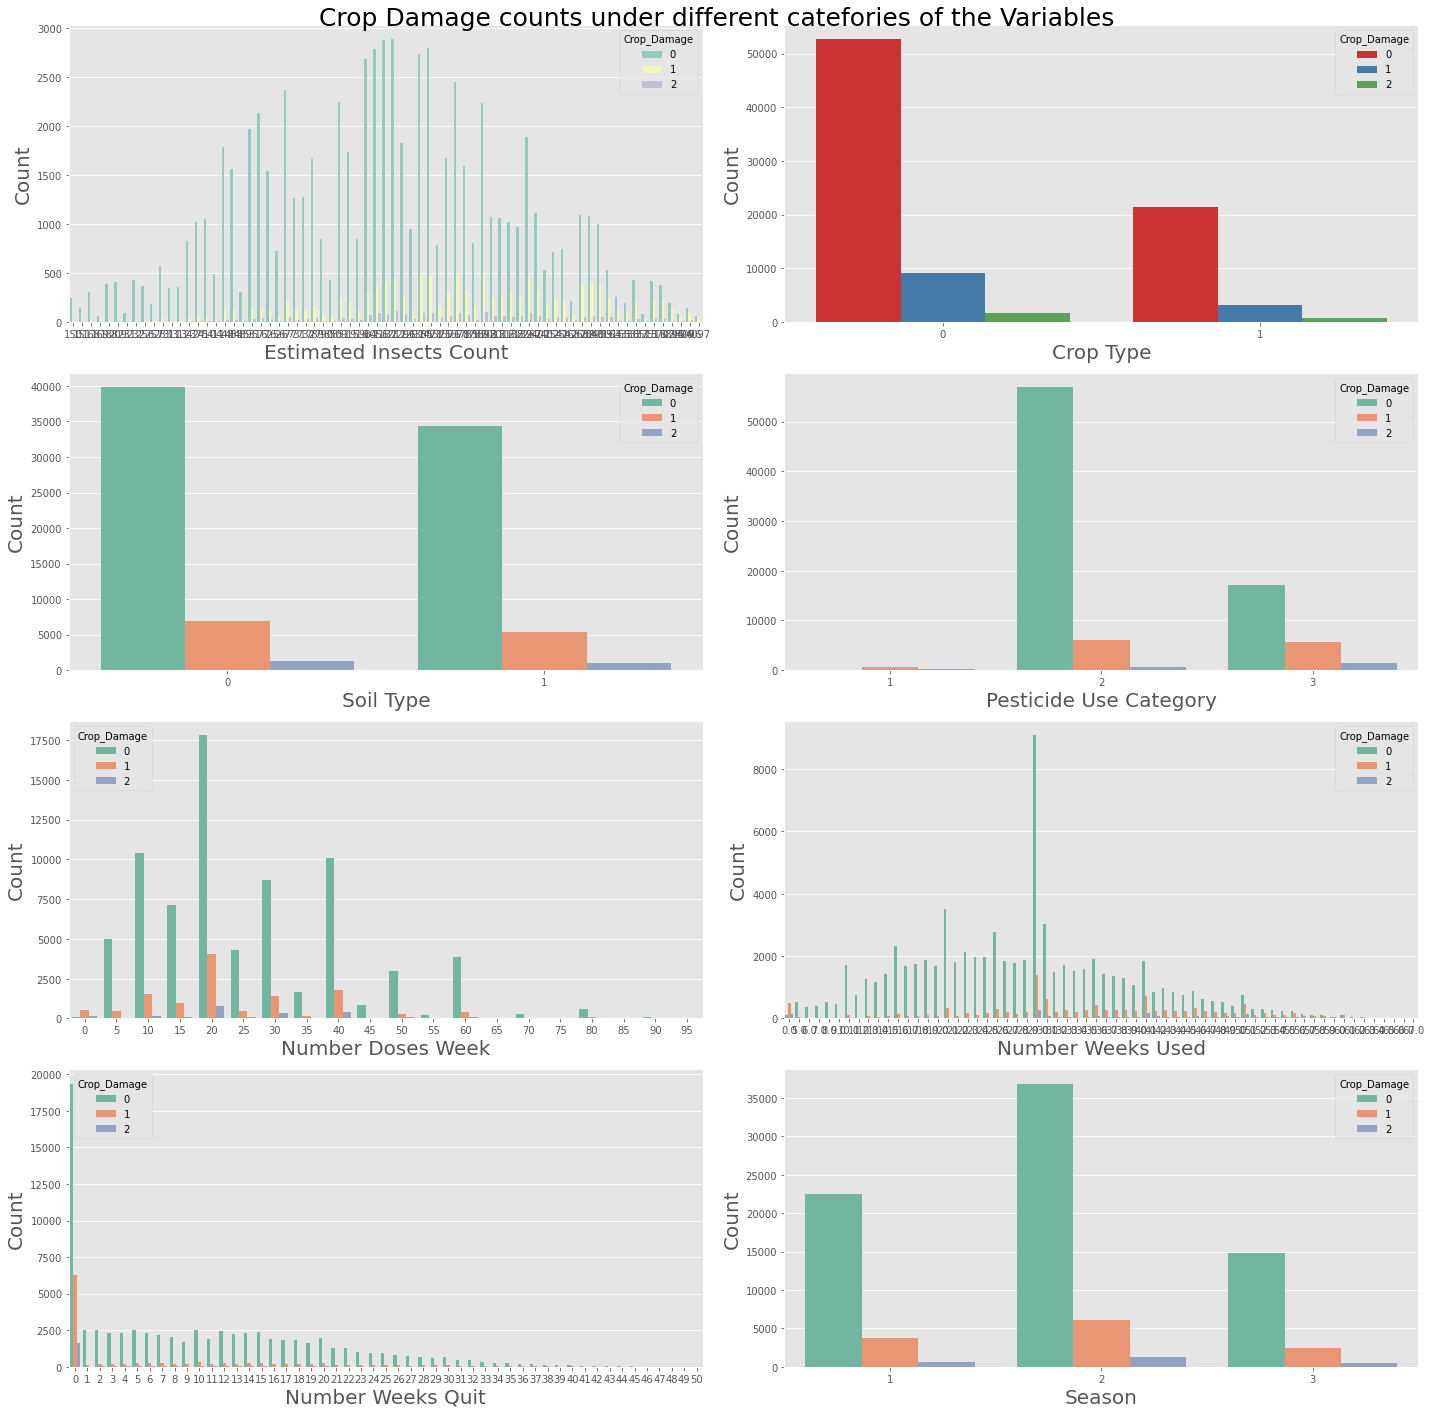

In [48]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8))  = plt.subplots(4,2, figsize=(20,20))

sns.countplot("Estimated_Insects_Count", data = train, hue = "Crop_Damage", palette = "Set3", ax=ax1)
ax1.set_xlabel("Estimated Insects Count", fontsize = 20)
ax1.set_ylabel("Count", fontsize = 20)
# ax1.legend(fontsize = 20)

sns.countplot("Crop_Type", data = train, hue = "Crop_Damage", palette = "Set1", ax=ax2)
ax2.set_xlabel("Crop Type", fontsize = 20)
ax2.set_ylabel("Count", fontsize = 20)

sns.countplot("Soil_Type", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax3)
ax3.set_xlabel("Soil Type", fontsize = 20)
ax3.set_ylabel("Count", fontsize = 20)

sns.countplot("Pesticide_Use_Category", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax4)
ax4.set_xlabel("Pesticide Use Category", fontsize = 20)
ax4.set_ylabel("Count", fontsize = 20)

sns.countplot("Number_Doses_Week", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax5)
ax5.set_xlabel("Number Doses Week", fontsize = 20)
ax5.set_ylabel("Count", fontsize = 20)

sns.countplot("Number_Weeks_Used", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax6)
ax6.set_xlabel("Number Weeks Used", fontsize = 20)
ax6.set_ylabel("Count", fontsize = 20)

sns.countplot("Number_Weeks_Quit", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax7)
ax7.set_xlabel("Number Weeks Quit", fontsize = 20)
ax7.set_ylabel("Count", fontsize = 20)

sns.countplot("Season", data = train, hue = "Crop_Damage", palette = "Set2", ax=ax8)
ax8.set_xlabel("Season", fontsize = 20)
ax8.set_ylabel("Count", fontsize = 20)

fig.suptitle('Crop Damage counts under different catefories of the Variables', fontsize = 25)
fig.tight_layout()
plt.show()

##### Estimated_Insects_Count, Pesticide_Use_Category, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit have negative impact on crop damage.
##### Soil type has less or no impact on crop damage


## Dealing with the data imbalance

In [49]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

##### There are different methods for dealing with imbalanced datasets. 
##### Resampling is widely adopted technique for dealing with highly imbalanced datasets.
##### It consists of: 
##### 1.removing samples from the majority class (under-sampling) and/or
##### 2.adding more examples from the minority class (over-sampling).

In [50]:
train_crop_damage_0 = train[train['Crop_Damage'] == 0]
train_crop_damage_1 = train[train['Crop_Damage'] == 1]
train_crop_damage_2 = train[train['Crop_Damage'] == 2]

In [51]:
from sklearn.utils import resample #resampling of minority data.

train_crop_damage_1_unsample = resample(train_crop_damage_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=25000,    # to match majority class
                                 random_state=101) # reproducible results

train_crop_damage_2_unsample = resample(train_crop_damage_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=15000,    # to match majority class
                                 random_state=101) # reproducible results

##### In this dataset over-sampling i.e adding more examples in the minority class is used in crop_damage_1 and crop_damage_2

In [52]:
#creating new training set with upsampled data.
train_resampled = pd.concat([train_crop_damage_0, train_crop_damage_1_unsample, train_crop_damage_2_unsample])

In [53]:
train_resampled.info() #gives information about all the variables of upsampled training set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114238 entries, 0 to 63888
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       114238 non-null  object 
 1   Estimated_Insects_Count  114238 non-null  int64  
 2   Crop_Type                114238 non-null  int64  
 3   Soil_Type                114238 non-null  int64  
 4   Pesticide_Use_Category   114238 non-null  int64  
 5   Number_Doses_Week        114238 non-null  int64  
 6   Number_Weeks_Used        114238 non-null  float64
 7   Number_Weeks_Quit        114238 non-null  int64  
 8   Season                   114238 non-null  int64  
 9   Crop_Damage              114238 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 9.6+ MB


## Creating set for training and testing

In [54]:
train_df = train_resampled.drop(['ID'], axis = 1) #dropping ID column
predict_df = predict.drop(['ID'], axis = 1) #dropping ID column

## Splitting of training data

In [55]:
X = train_df.drop(['Crop_Damage'], axis = 1) #dropping target column
y = train_df['Crop_Damage'] #target column

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2, 
                                                  random_state = 101,
                                                  stratify = y)         #creating training and test set. 

##### X is train samples and y is the corresponding labels

## Normalizing the Dataset

In [56]:
scaler = MinMaxScaler() #creating an instance

X_train = scaler.fit_transform(X_train) #normalizing training set
X_test = scaler.transform(X_test) #normalizing test set
predict_df = scaler.transform(predict_df) #normalizing predict set

## Evaluation of Model 

## Classification using Decision Tree (DT) Classifier

In [57]:
clf_DT = DecisionTreeClassifier() #creating an instance of decision tree classifier
clf_DT.fit(X_train, y_train) #fitting on training data

DecisionTreeClassifier()


## Evaluation of the Default DT classifier 

In [58]:
clf_DT = DecisionTreeClassifier(random_state=42)
clf_DT.fit(X_train, y_train) #fitting on training data
y_pred = clf_DT.predict(X_test)

print('Acuuracy is: ', accuracy_score(y_test, clf_DT.predict(X_test))) #calculating accuracy score on validation set.

Acuuracy is:  0.8493960084033614


## Grid Search and cross-validation  for DT classifier

In [59]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(3, 35, 1).tolist()}

clf_DT = DecisionTreeClassifier(random_state=42)
grid_search_DT = GridSearchCV(estimator=clf_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5, #cv=5 is for cross validation, here it means 5-folds cross validation.
                           n_jobs=-1)
start = time()
# fit the model with the best hyper-parameters
grid_result_DT = grid_search_DT.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_DT.cv_results_['params'])))

GridSearchCV took 15.35 seconds for 64 candidate parameter settings.


##### Optimisation of two important parameters ('criterion' and 'max_depth') was done using GridSearchCV. Other parameters are remain default.
##### So these two parameters are putted as a list of values from which the best value of parameters is selected through GridSearchCV.

In [60]:
y_pred = np.round(grid_result_DT.predict(X_test), 2)

## Best hyperparameters for DT in the grid search

In [61]:
grid_result_DT.best_params_

{'criterion': 'entropy', 'max_depth': 34}

##### GridSearchCV have selected the best value of parameters i.e 'criterion': 'entropy', 'max_depth': 34

In [62]:
cv_result_DT = pd.DataFrame(grid_result_DT.cv_results_)
cv_result_DT = cv_result_DT[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result_DT = cv_result_DT.sort_values(by='rank_test_score')
display(cv_result_DT)
print(cv_result_DT.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
63,entropy,34,0.832312,0.830725,0.833078,0.835868,0.831929,0.832783,0.001720,1
62,entropy,33,0.832312,0.830725,0.833023,0.835868,0.831929,0.832772,0.001718,2
59,entropy,30,0.833023,0.830890,0.832695,0.834774,0.832257,0.832728,0.001255,3
61,entropy,32,0.831874,0.830725,0.832367,0.835868,0.832531,0.832673,0.001718,4
58,entropy,29,0.830835,0.830397,0.833461,0.834829,0.832804,0.832465,0.001651,5
...,...,...,...,...,...,...,...,...,...,...
34,entropy,5,0.668180,0.669220,0.665664,0.673104,0.665554,0.668344,0.002772,60
1,gini,4,0.663639,0.662545,0.664186,0.663092,0.658989,0.662490,0.001834,61
33,entropy,4,0.661998,0.662436,0.659810,0.660794,0.658989,0.660805,0.001294,62
32,entropy,3,0.660740,0.660576,0.660028,0.659864,0.658442,0.659930,0.000813,63


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


## Accuracy after hyperparameter tuning

In [63]:
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth=34,random_state=42)
clf_DT.fit(X_train, y_train) #fitting on training data
y_pred = clf_DT.predict(X_test)

print('Acuuracy is: ', accuracy_score(y_test, clf_DT.predict(X_test))) #calculating accuracy score on validation set.

Acuuracy is:  0.8530724789915967


##### The accuracy after setting the best parameters is higher (85.30%) than that of default (84.93%) 

classification Report :
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     14848
           1       0.68      0.81      0.74      5000
           2       0.82      0.97      0.89      3000

    accuracy                           0.85     22848
   macro avg       0.81      0.87      0.84     22848
weighted avg       0.87      0.85      0.86     22848

Acuuracy is:  0.8530724789915967


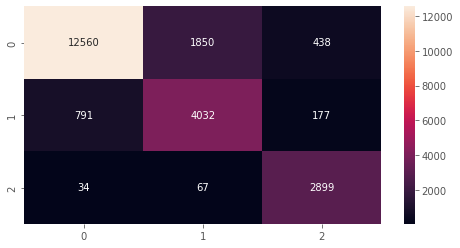

In [64]:
print('classification Report :\n', classification_report(y_test, clf_DT.predict(X_test))) #classificatio report on validation set
cm = confusion_matrix(y_test, clf_DT.predict(X_test)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_test, clf_DT.predict(X_test))) #calculating accuracy score on validation set.

##### A summary of important predictive analytics like accuracy (.85), recall (.85), precision (.87) and F1 Score (.86) results on this classification problem is visualized on confusion matrix. 

## Classification using Random Forest (RF) Classifier

In [65]:
clf_RF = RandomForestClassifier() #creating an instance of random forest classifier
clf_RF.fit(X_train, y_train) #fitting on training data

RandomForestClassifier()

## Evaluation of the Default RF classifier 

In [66]:
clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(X_train, y_train) #fitting on training data
y_pred = clf_RF.predict(X_test)

print('Acuuracy is: ', accuracy_score(y_test, clf_RF.predict(X_test))) #calculating accuracy score on validation set.


Acuuracy is:  0.904936974789916


## Grid Search and cross-validation  for RF classifier
### Best hyperparameters for RF in the grid search

In [67]:
# use a full grid over all parameters
param_grid = {"n_estimators": [50],"max_depth": [3, None],
              "max_features": [3, 8],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
clf_RF=RandomForestClassifier(random_state=42)
# run grid search
grid_search_RF = GridSearchCV(estimator=clf_RF,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)
start = time()
grid_search_RF.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_RF.cv_results_['params'])))

grid_search_RF.best_params_

GridSearchCV took 217.78 seconds for 48 candidate parameter settings.


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

#### The best parameters after grid search:

##### 'bootstrap': False; It is False, so, the whole dataset is used to build each tree.
   
##### 'criterion': 'entropy'; Quality of the spllit, supported criteria “entropy” for the information gain.
   
##### 'max_features': 3; considering 3 features at each split.
  
##### 'min_samples_split': 3; minimum 3 samples required to split an internal node
   
##### 'n_estimators': 50; 50 numbers of trees in the forest.

In [68]:
best_grid_RF = grid_search_RF.best_estimator_
best_grid_RF.fit(X_train, y_train)
pred_labels = best_grid_RF.predict(X_test)

#calculating accuracy score on test set.
print("Classification accuracy of RF (Grid Search) is", accuracy_score(y_test, best_grid_RF.predict(X_test))) 

Classification accuracy of RF (Grid Search) is 0.9078256302521008


##### The accuracy after setting the best parameters is higher (90.78%) than that of default (90.49%)

classification Report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     14848
           1       0.82      0.79      0.81      5000
           2       0.90      0.97      0.93      3000

    accuracy                           0.91     22848
   macro avg       0.89      0.90      0.89     22848
weighted avg       0.91      0.91      0.91     22848

Acuuracy is:  0.9078256302521008


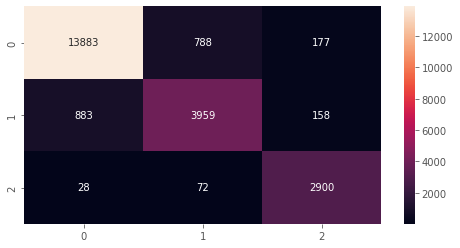

In [69]:
best_grid_RF.fit(X_train, y_train) #fitting on training data
print('classification Report :\n', classification_report(y_test, best_grid_RF.predict(X_test))) #classificatio report on validation set
cm = confusion_matrix(y_test, best_grid_RF.predict(X_test)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_test, best_grid_RF.predict(X_test))) #calculating accuracy score on validation set.

##### A summary of important predictive analytics like accuracy (.90), recall (.91), precision (.91) and F1 Score (.91) results on this classification problem is visualized on confusion matrix. 

## Classification using Multi-Layer Perceptron (MLP) Classifier

In [70]:
MLP = MLPClassifier() #creating an instance of mlp classifier
MLP.fit(X_train, y_train) #fitting on training data

MLPClassifier()

## Evaluation of the Default MLP classifier

In [71]:
MLP = MLPClassifier(random_state=42)#creating an instance of mlp classifier
MLP.fit(X_train, y_train) #fitting on training data
y_pred = MLP.predict(X_test)

print('Acuuracy is: ', accuracy_score(y_test, MLP.predict(X_test))) #calculating accuracy score on validation set.

Acuuracy is:  0.688813025210084


## Hyperparameter tuning to search best parameters for MLP classifier

In [72]:
parameter_space = {
    'hidden_layer_sizes': [100,200],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive']}

start = time()
MLP = MLPClassifier(random_state=42)
clf_MLP = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf_MLP.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf_MLP.cv_results_['params'])))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV took 1773.74 seconds for 16 candidate parameter settings.


In [73]:
# Best paramete set
print('Best parameters found:\n', clf_MLP.best_params_)

# All results
means = clf_MLP.cv_results_['mean_test_score']
stds = clf_MLP.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_MLP.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_pred = y_test, clf_MLP.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, clf_MLP.predict(X_test)))

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'solver': 'adam'}
0.670 (+/-0.010) for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'solver': 'sgd'}
0.685 (+/-0.001) for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'solver': 'adam'}
0.670 (+/-0.011) for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.685 (+/-0.001) for {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.660 (+/-0.003) for {'activation': 'tanh', 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'solver': 'sgd'}
0.685 (+/-0.003) for {'activation': 'tanh', 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'solver': 'adam'}
0.660 (+/-0.004) for {'activation': 'tanh', 'hidden_layer_sizes': 200, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.685 (+/-0.003) for {'activation': 'tanh', 'hidden_layer

### The best parameters are :
#### 'activation': 'relu', 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'solver': 'adam'

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

classification Report :
               precision    recall  f1-score   support

           0       0.75      0.94      0.83     14848
           1       0.46      0.22      0.30      5000
           2       0.47      0.31      0.37      3000

    accuracy                           0.70     22848
   macro avg       0.56      0.49      0.50     22848
weighted avg       0.65      0.70      0.66     22848

Acuuracy is:  0.6968662464985994


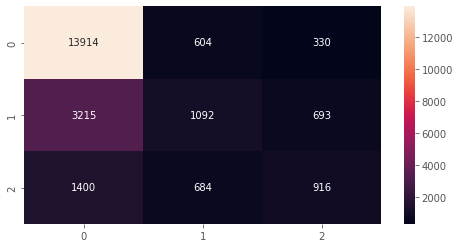

In [74]:
clf_MLP = MLPClassifier(activation = 'relu', hidden_layer_sizes = 200, learning_rate = 'constant', solver = 'adam', random_state=42) #creating an instance of mlp classifier
clf_MLP.fit(X_train, y_train) #fitting on training data

print('classification Report :\n', classification_report(y_test, clf_MLP.predict(X_test))) #classificatio report on validation set
cm = confusion_matrix(y_test, clf_MLP.predict(X_test)) #confusion matrix on validation set
sns.heatmap(cm, annot = True, fmt = 'd') #visualizing confusion matrix

print('Acuuracy is: ', accuracy_score(y_test, clf_MLP.predict(X_test))) #calculating accuracy score on validation set.

##### The accuracy after setting the best parameters is higher (69.68%) than that of default (68.88%)

##### A summary of important predictive analytics like accuracy (.69), recall (.70), precision (.65) and F1 Score (.66) results on this classification problem is visualized on confusion matrix. 

## Accuracy score for different Algorithms

| Method | Accuracy Score |
| --- | --- | 
| Random Forest Classifier | 90.78 |
| Decision Tree Classifier | 85.30 |
| MLP Classifier | 69.68 |

## Prediction on predict dataset (Dataset_2)

In [75]:
best_grid_RF = RandomForestClassifier(random_state = 42) #creating an instance of random forest classifier
best_grid_RF.fit(X_train, y_train) #fitting on training data
prediction = best_grid_RF.predict(predict_df) #predicting on test dataset

In [76]:
prediction

array([2, 1, 1, ..., 0, 0, 1])

## Feature importance

In [77]:
for i in range(len(best_grid_RF.feature_importances_)):
    print(f"{X.columns[i]}: {best_grid_RF.feature_importances_[i]}")

Estimated_Insects_Count: 0.31505163612987996
Crop_Type: 0.012474594931254185
Soil_Type: 0.016482361567034084
Pesticide_Use_Category: 0.04413952561908362
Number_Doses_Week: 0.14879884583544864
Number_Weeks_Used: 0.27253627381647066
Number_Weeks_Quit: 0.14757018160833713
Season: 0.04294658049249163


##### Most Important features are:
* Estimated insects count 
* Number weeks used
* Number doses week
* Number weeks quit

## Conclusion

### Findings
* So, Random Forest Classifier performs the best on this dataset. The prediction of crop condition derived by Random Forest Classifier model which will provide accurate estimation of farming parameters to optimize the economic efficiency of crop production.

* We have been able to identify certain critical factors from the project analysis, such as Estimated Insects Count, Number Weeks Used, Number Doses Week, and Number Weeks Quit. These have a substantial impact on the crop's damage. Higher insect counts, no chemical used in pest management, or a higher amount of pesticide use over a longer period of time are all adverse to a successful crop. So, the importance of impact of different features on crop condition will be beneficial for farmer to prioritize the intercultural operations throughout the cropping season.

### Limitations
* For the time bindings, only 3 algorithms are used in this dataset. The best accuracy was found among three classifier is only 90.78%.  

## Recommendations for Future work

* Some other machine learning algorithms could be tested in order to check the better accuracy scores.
* These findings may aid researcher and extension communities in developing future work plans based on artificial machine learning intelligence.
* Hope to use CNN (Convolutional Neural Network) in insect identification, insect damage identification and pesticide residue determination. 

## The End